In [1]:
# Librerias a utilizar 
import pandas as pd
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import seaborn as sns
from scipy.optimize import fsolve
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Renatta Garcia Sanchez, Alejandro Michel Marrón


**Expediente** : 703275 , 719889
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Liga repositorio:** https://github.com/HKael/proyecto_modulo1



#   <div style="text-align:center"><span style="color:#154898; font-family:Rockwell; font-size:1.6em;">  Readmisión de pacientes en hospitales </span></div> </p>
El proposito de este proyecto es analizar los factores que afectan a la readmisión de los pacientes a los hospitales. De esta forma se pueden proponer soluciones para disminuir el reingreso de pacientes a los hospitales. 



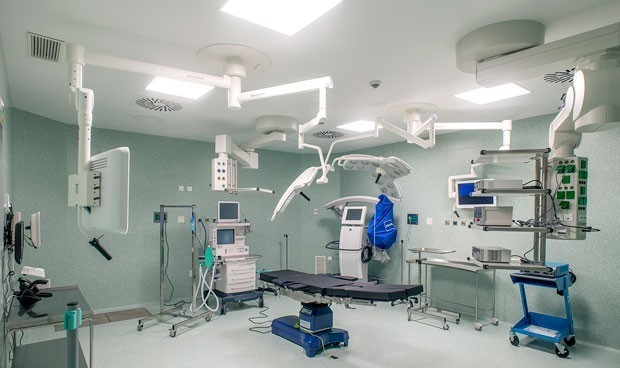


## Objetivos

### Objetivos generales

El objetivo de este proyecto es el análisis de diversos factores en los pacientes que fueron readmitidos dentro de los siguientes 30 días de haber sido dados de alta del hopsital. Entre los factores de estudio se encuentran el tiempo de estadía en la visita previa, el número de medicamentos que fueron administrados al paciente, el número de estudios de laboratorio, número de procedimientos médicos realizados, así como el género del paciente.

### Objetivos específicos

- Analizar el comportamiento de la cantidad de medicamentos que recibieron los pacientes que fueron reamditidos dentro de los siguientes 30 días de su readmisión al hospital. 

- Analizar el comportamiento de el tiempo de estadia en su última visita al hospital de los pacientes que fueron reamditidos dentro de los siguientes 30 días de su readmisión al hospital.

## Definición del problema

Es de suma importancia conocer el comportamiento de los pacientes que se espera sean readmitidos dentro de los siguientes días en el hospital, desde un punto de vista administrativo y para el paciente. Administrativamente esto permite llevar un control más cerano de los pacientes que posiblemente serán readmitidos. A los pacientes les sirve conocer esto ya que estarán más al pendiente de su salud dentro de los siguientes 30 días y podrán atendense en su debido momento. 

### Supuestos

- Diagnóstico correcto.
- Procedimientos realizados están mínimamente relacionados.
- Los medicamentos administrados son correctos y necesarios. No hay exceso ni faltantes.


### Hipótesis
 
- La población de hombres y mujeres se pueden considerar iguales, es decir no existe diferencia entre un paciente mujer y un paciente hombre médicamente hablando.

- La cantidad de medicamento y el tiempo en el hospital están correlacionados.


### Nodos 

- Tiempo total de estadía del paciente. 

- Número de medicamentos administrados al paciente durante su etadía en el hospital. 

Observando estos comportamientos podemos determinar a partir de los medicamentos dados cual es la probabilidad de estar en la población de reamditidos y de estar forma prestar más atención a estos pacientes y brindar más educación de salud a los mismos.

### Diagrama

El siguiente diagrama muestra todas las variables que se contemplan en la base de datos y en verde se muestran los nodos a simular. 

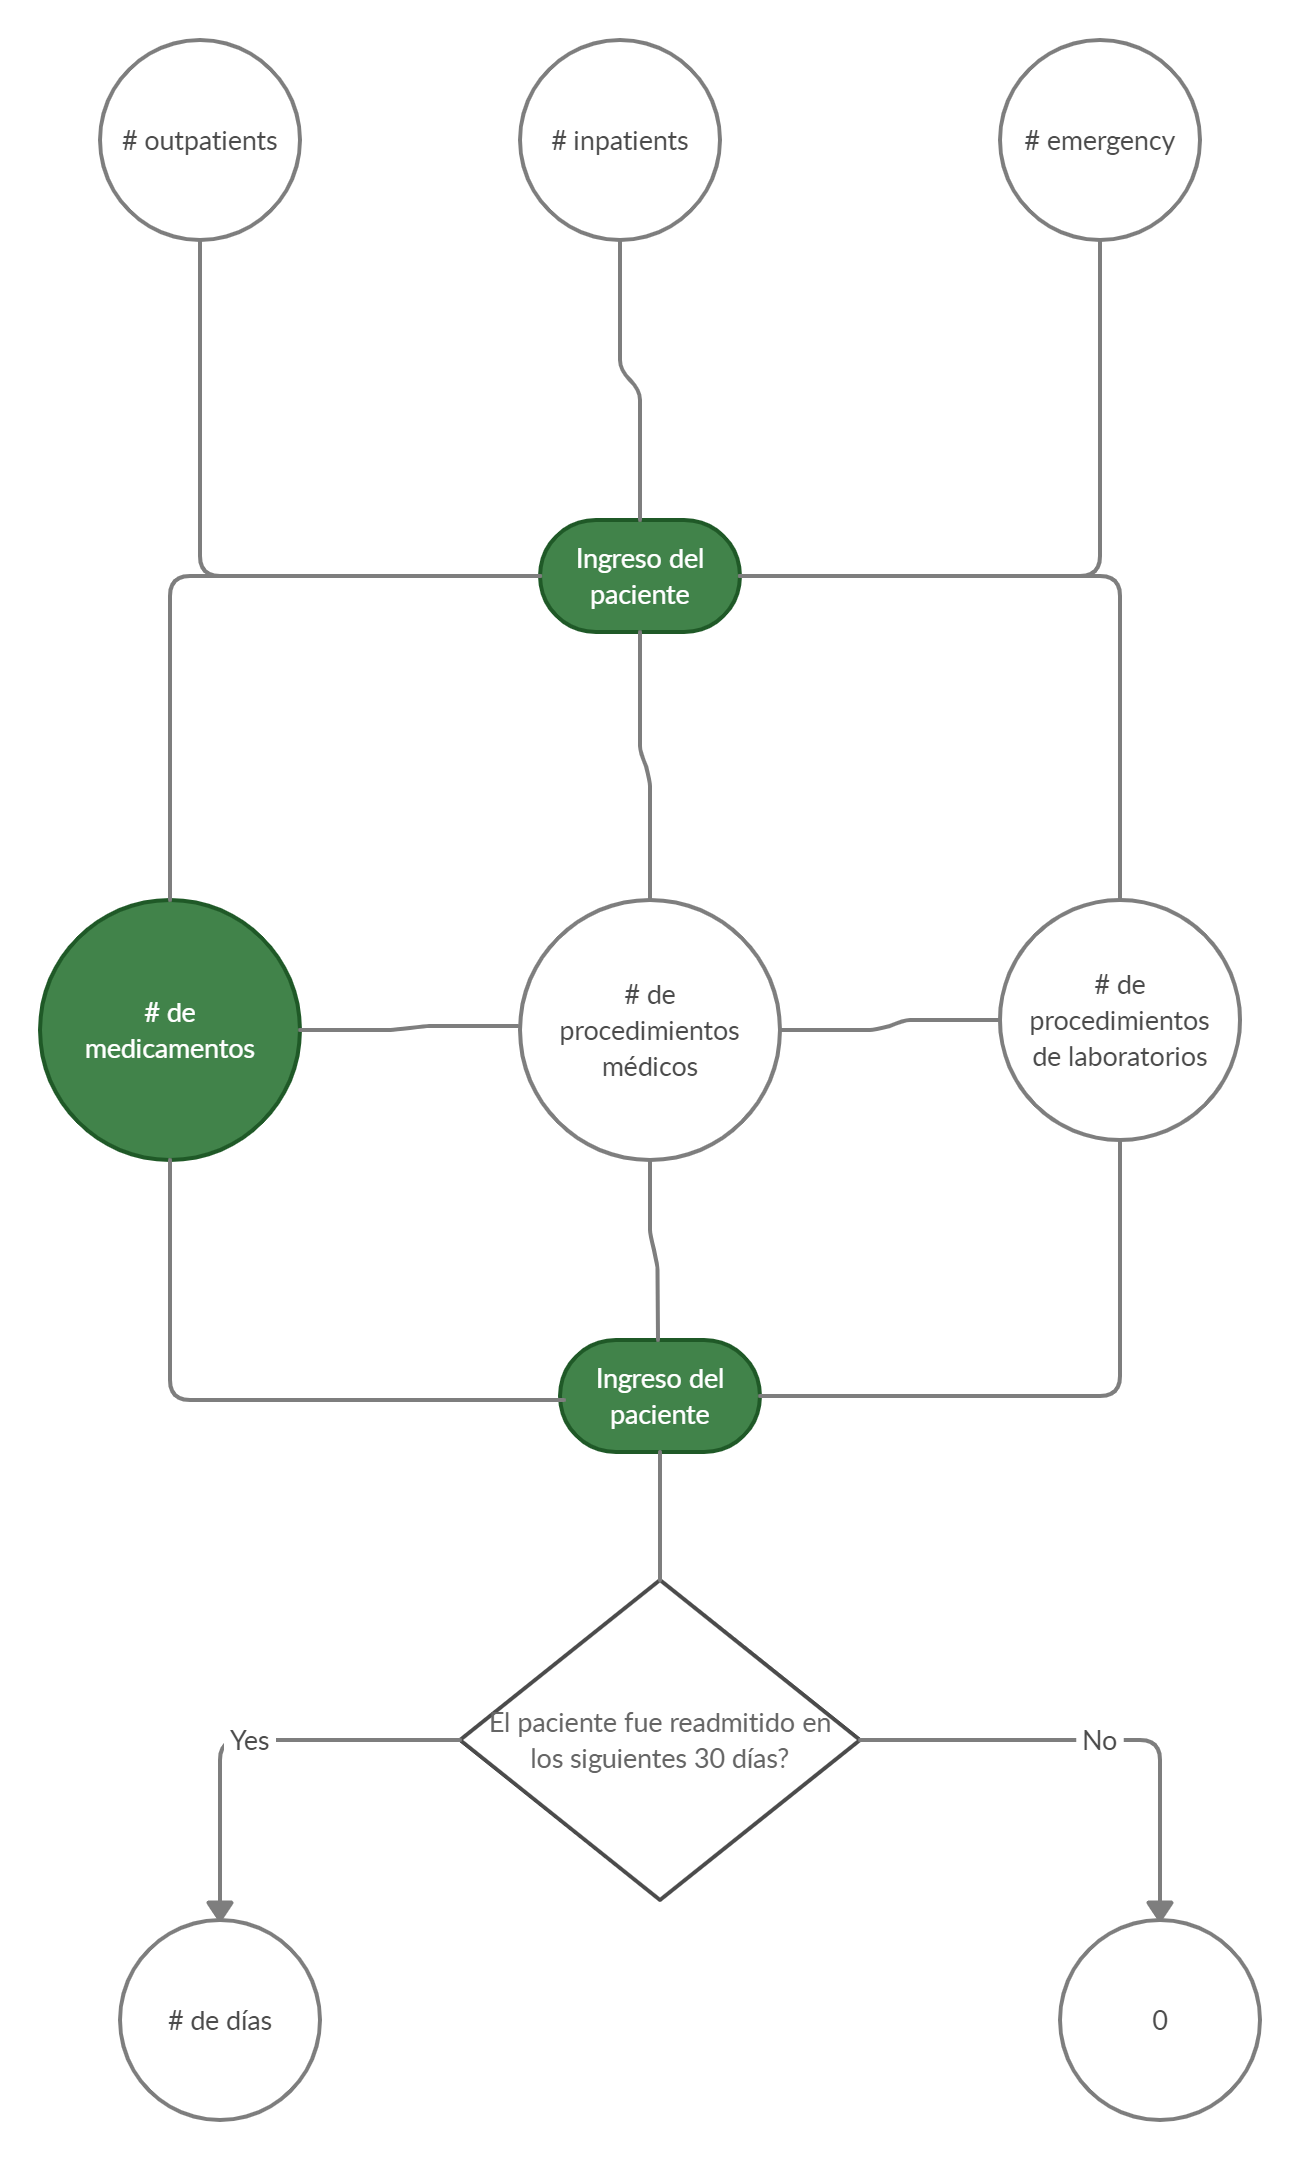

## Base de datos 

La base de datos de donde se obtendrán los datos es la siguiente: Health Facts database. Esta base de datos es realizada por un organismo no gubernamental y voluntario, donde se recopila información de distintos hospitales participantes quienes brindan la información de la atención que recibió cada paciente en el hospital, así como su información demográfica como raza y edad del paciente. La fuente específica es el Centro de Investigación Clínica y Traslacional, Virginia Commonwealth University

Esta misma base de datos puede ser recuperada de kaggle en le siguiente link: https://www.kaggle.com/dansbecker/hospital-readmissions/notebooks?sortBy=voteCount&group=everyone&pageSize=20&datasetId=52431

El número de días de readmisión se obtuvo de la siguiente base de datos que es una versión no procesada de la base anterior:
https://www.kaggle.com/brandao/diabetes?select=diabetic_data.csv

El siguiente dataframe muestra la base de datos general de donde se obtienen los datos.  

In [55]:
data=pd.read_csv("data")
data.head()

,Unnamed: 0,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted2
0,0,14,41,0,11,0,0,0,6,True,...,True,True,True,True,True,True,True,True,True,0
1,1,2,30,0,12,0,0,1,9,True,...,True,False,True,True,True,True,True,False,True,13
2,2,5,66,0,22,1,0,2,9,True,...,True,True,True,True,True,True,True,True,True,28
3,3,3,63,0,8,0,0,0,8,True,...,True,True,True,True,True,True,True,True,True,9
4,4,5,40,0,6,0,0,1,9,True,...,True,True,True,True,True,True,True,True,False,0


Para este proyecto vamos a tomar únicamente la primera, cuarta y última columna de datos, mientras que los datos demográficos los útilizaremos únicamente como referencia y tomaremos únicamente encuenta los datos de genéro ya que cualquier paciente se puede clasificar con estos. Por lo tanto podemos reducir nuestro data set a lo siguiente:

In [56]:
columnas=['Unnamed: 0','number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
          'race_Caucasian', 'race_AfricanAmerican', 'age_[70-80)', 'age_[60-70)', 'age_[50-60)', 'age_[80-90)',
          'age_[40-50)', 'payer_code_?', 'payer_code_MC', 'payer_code_HM',
          'payer_code_SP', 'payer_code_BC', 'medical_specialty_?',
          'medical_specialty_InternalMedicine','medical_specialty_Emergency/Trauma',
          'medical_specialty_Family/GeneralPractice', 'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
          'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
          'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428', 
          'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
          'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
          'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
          'tolbutamide_No', 'pioglitazone_No', 'rosiglitazone_No', 'acarbose_No',
          'miglitol_No', 'troglitazone_No', 'tolazamide_No', 'examide_No',
          'citoglipton_No', 'insulin_No', 'glyburide-metformin_No',
          'glipizide-metformin_No', 'glimepiride-pioglitazone_No',
          'metformin-rosiglitazone_No', 'metformin-pioglitazone_No', 'change_No','diabetesMed_Yes']
data.drop(columnas, axis=1, inplace=True)
data.head()



,time_in_hospital,num_lab_procedures,num_procedures,num_medications,gender_Female,readmitted2
0,14,41,0,11,False,0
1,2,30,0,12,True,13
2,5,66,0,22,True,28
3,3,63,0,8,True,9
4,5,40,0,6,True,0


Tomaremos únicamente los datos de aquellos pacientes que fueron readmitidos, es decir aquellos que en la columna de readmitted su valor sea diferente de cero

In [57]:
data=data[data['readmitted2']!=0]
data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,gender_Female,readmitted2
1,2,30,0,12,True,13
2,5,66,0,22,True,28
3,3,63,0,8,True,9
6,4,47,0,9,True,22
8,7,52,1,22,False,2


## Variables relevantes 

>**time_in_hospital:** Tiempo de estadía en última visita. Esta variable abarca desde que fue ingresado el paciente hasta que salió del hospital.


>**num_medications:** Número de medicamentos administrados en su última estancia en el hospital.


>**num_lab_procedures:** Número de estudios de laboratorio en su última estancia en el hospital.


>**num_procedures:** Procedimientos médicos en su última estancia en el hospital. 

>**gender_Female:** Nos indica si el género del paciente es o no femenino.

## Conceptos  y definiciones relevantes para el proyecto

### Prueba de independencia χ² Chi-squared 
Se utiliza cuando se tiene una muestra de n individuos que se clasifican respecto a dos variables, preferentemente cualitativas (nominales dicotómicas o politómicas) y se desea conocer a partir de datos muestrales, si existe asociación de estas a nivel poblacional.

### Regresión lineal
El análisis de la regresión es un proceso estadístico para estimar las relaciones entre variables. 
La regresión lineal o ajuste lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente Y, las variables independientes Xi y un término aleatorio ε.

### Histograma 
Es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua

### Distribución de probabilidad
La distribución de probabilidad de una variable aleatoria es una función que asigna a cada suceso definido sobre la variable la probabilidad de que dicho suceso ocurra. La distribución de probabilidad está definida sobre el conjunto de todos los sucesos y cada uno de los sucesos es el rango de valores de la variable aleatoria. 

#### Para variables discretas...
Se denomina distribución de variable discreta a aquella cuya función de probabilidad solo toma valores positivos en un conjunto de valores de *X* finito o infinito numerable. A dicha función se le llama función de masa de probabilidad. En este caso la distribución de probabilidad es la suma de la función de masa

# Separación de datos por nodo

In [58]:
#Nodo 1
N_1=np.array(data.time_in_hospital)




#Nodo 2
N_2=np.array(data.num_medications)



#Nodo 3
N_3=np.array(data.num_lab_procedures)




#Nodo 4
N_4=np.array(data.num_procedures)



# Funciones relavantes:

La siguiente función nos permite dibujar histogramas para distribuciones discretas con parámetros de entrada únicamente de la distribución, el nombre del eje x, el nombre del eje y y un título para el histograma.

In [6]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            xlabel:'x label',
                            ylabel: 'y label',
                            title: 'title'):
    '''Función para graficar el histograma de una distribución discreta'''
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [361]:
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='u', **kwargs)
    return kde.pdf(x_grid)

def kde_statsmodels_func(x, bandwidth=0.2):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='u')
    return lambda u: kde.pdf(u)

In [8]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Función que aplica el método de la transformada inversa para calcular números que distribuyan como una distribución
    discreta dada'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

In [9]:
def estra_igualmente_espaciado(B:'Número de estratos'):
    """
    Esta función aplica el método de estratficacación con un número de estratos dados a valores aleatorios que se encuentran
    entre 0 y 1
    """
    U= np.random.rand(B)
    i= np.arange(0,B)
    estratos= (U+i)/B
    return estratos

In [400]:
def acep_rechazo_simplificada_dis(
    N:'Cantidad de variables a generar',
    Dom_f:'Dominio de la función f como tupla (a,b)',
    f:'función objetivo a generar',
    max_f:'máximo valor de f'):
    
    X = np.zeros(N)
    i=0
    while i<N:
        R2=np.random.uniform(0,max_f)
        R1=np.random.randint(Dom_f[0], Dom_f[1])
        if R2<= f([R1]):
            X[i]=R1
            i+=1
    return X

## Visualización de los datos del nodo 1: time in hospital

Dado que estamos trabajando con distribuciones discretas dibujaremos el histograma correspondienta a variables discretas para observar a grandes rasgos su distribución. 

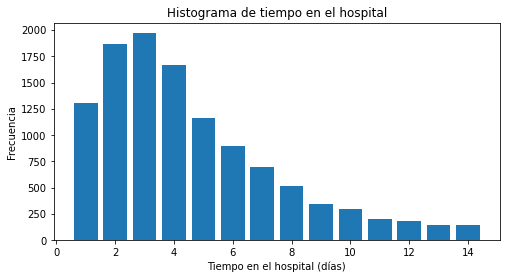

In [10]:
#histograma para el nodo 1
plot_histogram_discrete(N_1, 'Tiempo en el hospital (días)', 'Frecuencia', 'Histograma de tiempo en el hospital')

## Tabla de valores, frecuencias y probabilidad

A continuación construimos una tabla de valores, frecuencias y probabilidades, las frecuencias se utilizan para calcular la probabilidad y de esta forma poder observar más de cerca la distribución y trabajar con ella. 

In [11]:
#creación de dataframe que contiene los valores únicos sus frecuencias y su probabilidad asociada a cada valor.
N_1_frec_prob=pd.DataFrame({'Valores': np.unique(N_1, return_counts=True)[0],
                            'Frecuencias':np.unique(N_1, return_counts=True)[1]}) 
N_1_frec_prob['Probabilidad']=N_1_frec_prob['Frecuencias']/len(N_1)

N_1_frec_prob

,Valores,Frecuencias,Probabilidad
0,1,1309,0.114724
1,2,1866,0.163541
2,3,1970,0.172656
3,4,1671,0.146450
4,5,1162,0.101840
5,6,900,0.078878
6,7,693,0.060736
7,8,513,0.044961
8,9,349,0.030587
9,10,299,0.026205


La gráfica siguiente es una gráfica de probabilides con su respectiva probabilidad, como era de esperase se comporta de la misma forma que el histograma de frencuencias. 

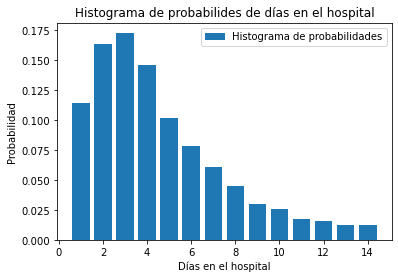

In [12]:
plt.bar(N_1_frec_prob.Valores, N_1_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.xlabel('Días en el hospital')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides de días en el hospital')
plt.legend()
plt.show()

## Kernel density estimation

A continuación calcularamos la función de masa de probabilidad (PMF) a partir del método de kernel density estimation, aplicamos la función de statsmodel porque esta permite tomar datos discretos o de diferentes tipos.

C:\Users\aleja\anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


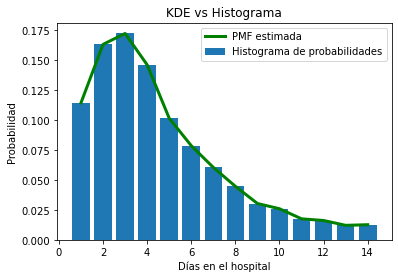

In [13]:
#definimos el grid sobre el que vamos a trabajar
N_1_grid=np.arange(1,15)

#aplicamos nuestra función 
pmf_N1=kde_statsmodels_m(N_1, N_1_grid, bandwidth=0.2)

#gráfica
plt.bar(N_1_frec_prob.Valores, N_1_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.plot(N_1_grid, pmf_N1, label='PMF estimada', color='g', linewidth=3)
plt.xlabel('Días en el hospital')
plt.ylabel('Probabilidad')
plt.title('KDE vs Histograma')
plt.legend()
plt.show()

Observamos que la pmf generada por medio del kernerl densitiy estimation es prácticamente perfecta, esto nos sirve para en el futuro poder simular más datos. 

## Método de aceptación y rechazo usando KDE

ValueError: x and y must have same first dimension, but have shapes (14,) and (11410,)

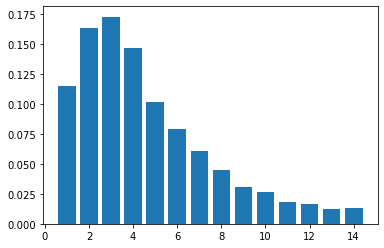

In [401]:
f_kde_n1=kde_statsmodels_func(N_1)
pmf_kde_N1=acep_rechazo_simplificada_dis(len(N_1), (1,14), f_kde_n1, max(pmf_N1))

#gráfica
plt.bar(N_1_frec_prob.Valores, N_1_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.plot(N_1_grid, pmf_kde_N1, label='PMF estimada', color='g', linewidth=3)
plt.xlabel('Días en el hospital')
plt.ylabel('Probabilidad')
plt.title('KDE vs Histograma')
plt.legend()
plt.show()

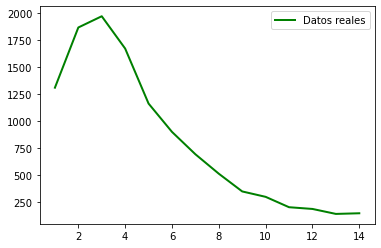

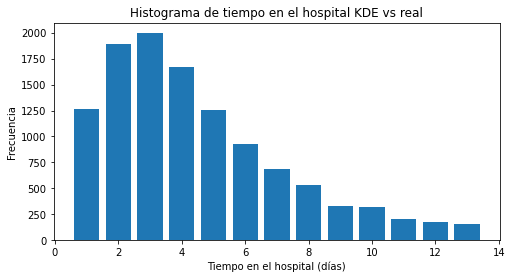

In [408]:
#gráfica
plt.plot(N_1_frec_prob.Valores, N_1_frec_prob.Frecuencias, color='g', lw=2, label='Datos reales')




## Método de la transformada inversa para generar números pseudoaleatorios

Dado que tenemos una distribución discreta utilizamos el método de la transformada inversa para generar números pseudoaleatorios que disrtibuyan coomo nuestros datos. Para hacer esto calculamos la probabilidad acumulada y después aplicamos el método para N números. 

In [14]:
#Se añade la probabilidad acumulada
N_1_frec_prob['Acumulada']=N_1_frec_prob.Probabilidad.cumsum()
N_1_frec_prob

,Valores,Frecuencias,Probabilidad,Acumulada
0,1,1309,0.114724,0.114724
1,2,1866,0.163541,0.278265
2,3,1970,0.172656,0.450920
3,4,1671,0.146450,0.597371
4,5,1162,0.101840,0.699211
5,6,900,0.078878,0.778089
6,7,693,0.060736,0.838826
7,8,513,0.044961,0.883786
8,9,349,0.030587,0.914373
9,10,299,0.026205,0.940578


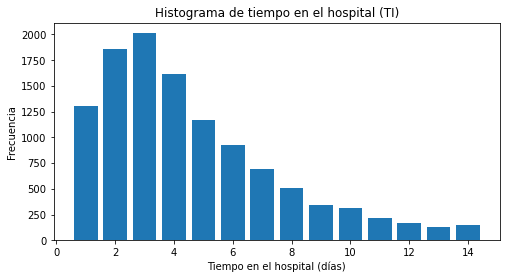

In [15]:
N=len(N_1) #números a generar
N_1_u=np.random.rand(N) #generamos números aleatorios entre 0 y 1
v_N1=Gen_distr_discreta(N_1_u, N_1_frec_prob.Acumulada)+1 #aplicamos el método de la transformada inversa

plot_histogram_discrete(v_N1, 'Tiempo en el hospital (días)', 'Frecuencia', 'Histograma de tiempo en el hospital (TI)')

Podemos observar a partir del histograma realizado por el método de la transformada inversa que en su forma la distribución de los datos sí es muy similar. En la gráfica siguiente graficamos ambos datos para observar más fácilmente la diferencia. 

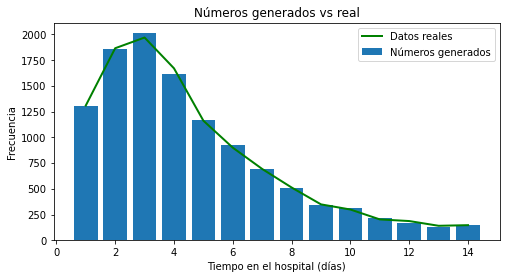

In [16]:
plt.figure(figsize=[8,4])
y,x = np.histogram(v_N1,bins = len(set(v_N1))) 
plt.bar(list(set(v_N1)),y, label= 'Números generados')
plt.plot(N_1_frec_prob.Valores, N_1_frec_prob.Frecuencias, color='g', lw=2, label='Datos reales')
plt.legend()
plt.xlabel('Tiempo en el hospital (días)')
plt.ylabel('Frecuencia')
plt.title('Números generados vs real')
plt.show()

A partir de está grafica es fácil ver que los datos generados con el método de la transoformada inversa si distribuyen muy similarmente a los valores reales, si bien no es exactamente igual, la forma es casi la misma y son pocos los valores que se salen o que les falta.

## Media y desviación estándar teórica

La esperanza de una distribución discreta se calcula con la siguiente fórmula:

$$E[X]=\sum_{j=1}^{m} p_jx_j.$$

La varianza de una distribución discreta se calcula con la siguiente fórmula:

$$\sigma_X^2=\sum_{j=1}^{m} p_j(x_j-E[X])^2.$$

In [17]:
media_N1= np.sum([N_1_frec_prob.Valores[i]*N_1_frec_prob.Probabilidad[i] 
               for i in range(len(N_1_frec_prob.Frecuencias))])

sigma_N1=np.sqrt(np.sum([N_1_frec_prob.Probabilidad[i]*(N_1_frec_prob.Valores[i] - media_N1)**2
               for i in range(len(N_1_frec_prob.Frecuencias))]))

print('Media por medio de definición de distibuciones discretas: ', media_N1)
print('Desviación estándar por medio de definición de distibuciones discretas: ', sigma_N1)

Media por medio de definición de distibuciones discretas:  4.5836108676599485
Desviación estándar por medio de definición de distibuciones discretas:  3.019956051247803


## Montecarlo

In [18]:
N = len(N_1)
u1 = np.random.rand(N) #generación de valores aleatorios
f_u1 = Gen_distr_discreta(u1,N_1_frec_prob.Acumulada)+1 #función 
media_montecarlo_N1 = np.mean(f_u1)
sigma_montecarlo_N1= np.std(f_u1)


print('Media con Montecarlo: ', media_montecarlo_N1)
print('La desviación estándar con el método montecarlo: ', sigma_montecarlo_N1)

Media con Montecarlo:  4.585188431200701
La desviación estándar con el método montecarlo:  3.0327990392864828


## Método de reducción de varianza: estratificación

In [19]:
f_u2= lambda U: Gen_distr_discreta(U, N_1_frec_prob.Acumulada)+1
U= estra_igualmente_espaciado(N)
valores_estrat_N1= f_u2(U)
media_estrat_N1=np.mean(valores_estrat_N1)
sigma_estrat_N1=np.std(valores_estrat_N1)

print('Media con reudcción de viaranza estratificada=', media_estrat_N1)
print('La desviación estándar con el método de esratificación es: ', sigma_estrat_N1)

Media con reudcción de viaranza estratificada= 4.583610867659948
La desviación estándar con el método de esratificación es:  3.019956051247803


## Método de reducción de varianza: números complementarios

In [20]:
ri = np.random.rand(N)
ri_c = 1-ri 
U1= f_u2(ri)
U2= f_u2(ri_c)

m4 = (U1.mean()+U2.mean())/2

print('Media por medio del método de números Complementario: ', m4)

Media por medio del método de números Complementario:  4.596231375985977


## Estimación de parámetros para distribuciones y método cuantil cuantil

Estimaremos los parámetros para distintas disrtibuciones discretas y posteriormente utilizaremos el método cuantil cuantil para verificar el ajustes de los datos reales a una distribución dada

### Binomial

Los parámetros de la distribución binomial son n y p y estos los calcularemos a partir de la media y la desviación estándar.

- $\mu= np$
- $\sigma ^2 = np(1-p)$

A continuación estimaremos los parámetros para una distribución binomial para el nodo 1, utilizando la media y la varianza calculadas teóricamente. Primero despejamos las ecuacións usando n y p.

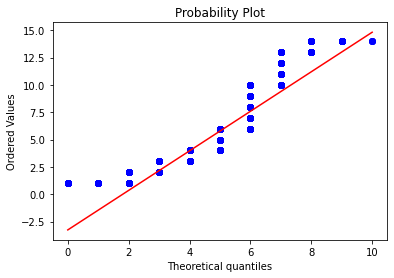

In [21]:
def binomial(x: 'Vector de valores para n y p'):
    'Esta función se utiliza para conocer los parámetros n y p, dadas miu y sigma'
    n=x[0]
    p=x[1]
    return [media_N1-n*p,
            (sigma_N1**2)-n*p*+n*p**2]

param_binom=fsolve(binomial, [1,0.6]) #estimación de parámetros
n=param_binom[0]; p=param_binom[1]



#aplicación del método cuantil cuantil
fig = plt.figure()
ax = fig.add_subplot(111)
res=st.probplot(N_1, dist='binom', sparams=param_binom, plot=ax)
plt.show()

### Poisson

Los parámetros de la distribución de poisson es lambada que corresponde a la media de los datos, por lo tanto utilizaremos la media para aplicar el método de cuantil cuantil 



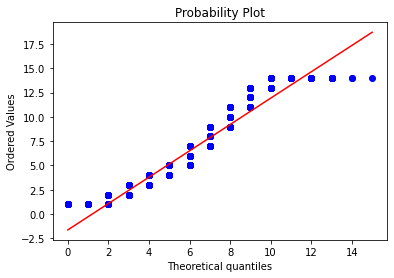

In [22]:
lambda_p= media_N1 #parámetro de la distribución poisson


fig = plt.figure()
ax = fig.add_subplot(111)
res=st.probplot(N_1, dist='poisson', sparams=( lambda_p), plot=ax)
plt.show()

### Geométrica

Los parámetros de la distribución goemétrica corresponde a p y este lo podemos estimar diréctamente de la media, con la siguiente igualdad. 

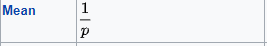



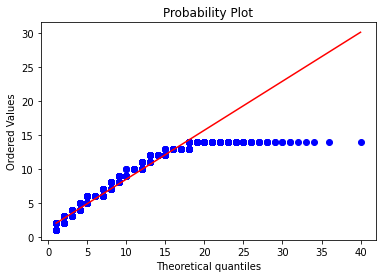

In [23]:
p_geom=1/media_N1 #parámetro p

fig = plt.figure()
ax = fig.add_subplot(111)
res=st.probplot(N_1, dist='geom', sparams=(p_geom), plot=ax)
plt.show()

### Distribución binomial negativa

La distribución binomial depende de los parámetros r y p que se pueden estimar con el siguiente sistema de ecuaciones.
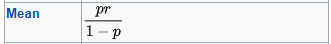
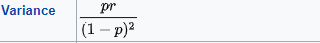

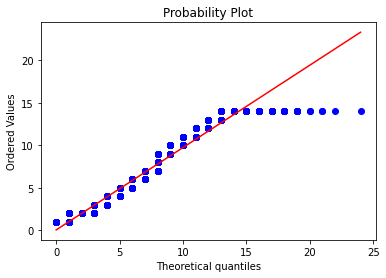

In [24]:
def nbinom(x: 'Vector de valores para n y p'):
    'Esta función se utiliza para conocer los parámetros n y p, dadas miu y sigma'
    p=x[0]
    r=x[1]
    return [media_N1-(p*r)/(1-p),
            (sigma_N1**2)-(p*r)/(1-2*p+p**2)]

param_nbinom=fsolve(nbinom, [0.6,1])
p_binom=param_nbinom[0]; r=param_nbinom[1]


fig = plt.figure()
ax = fig.add_subplot(111)
res=st.probplot(N_1, dist='nbinom', sparams=(r,p_binom), plot=ax)
plt.show()

A partir de esto podemos determinar que la distribución que mejor se ajusta es la distribución binomial con los siguientes parámetros

In [25]:
print('El parámetro n para la disrtibución binomial es', n)
print('El parámetro p para la distribución binomial es', p)

El parámetro n para la disrtibución binomial es 10.558980206230629
El parámetro p para la distribución binomial es 0.434095980684273


En la siguiente gráfica mostramos nuestra distribución real junto con la teórica estimada.

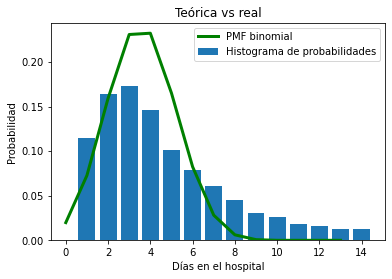

In [26]:
pmf_binom_N1=getattr(st, 'binom').pmf(N_1_frec_prob.Valores, n,p)

#gráfica
plt.bar(N_1_frec_prob.Valores, N_1_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.plot(pmf_binom_N1, label='PMF binomial', color='g', linewidth=3)
plt.xlabel('Días en el hospital')
plt.ylabel('Probabilidad')
plt.title('Teórica vs real')
plt.legend()
plt.show()

para el caso del nodo 1 observamos que el uso de una distribución teórica no es bueno, en este caso es mucho mejor usar la función de transformada inversa o bien la pmf generada por el KDE. 

## Visualización de los datos del nodo 2: Num medications

Dado que estamos trabajando con distribuciones discretas dibujaremos el histograma correspondienta a variables discretas para observar a grandes rasgos su distribución. 

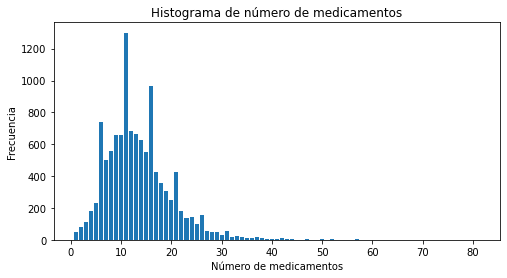

In [27]:
plot_histogram_discrete(N_2, 'Número de medicamentos', 'Frecuencia', 'Histograma de número de medicamentos')

## Tabla de valores, frecuencias y probabilidad

A continuación construimos una tabla de valores, frecuencias y probabilidades, las frecuencias se utilizan para calcular la probabilidad y de esta forma poder observar más de cerca la distribución y trabajar con ella. 

In [29]:
N_2_frec_prob=pd.DataFrame({'Valores': np.unique(N_2, return_counts=True)[0],
                            'Frecuencias':np.unique(N_2, return_counts=True)[1]})
N_2_frec_prob['Probabilidad']=N_2_frec_prob['Frecuencias']/len(N_2)

N_2_frec_prob

,Valores,Frecuencias,Probabilidad
0,1,18,0.001578
1,2,34,0.002980
2,3,78,0.006836
3,4,109,0.009553
4,5,179,0.015688
...,...,...,...
62,64,1,0.000088
63,68,1,0.000088
64,69,2,0.000175
65,72,1,0.000088


La gráfica siguiente es una gráfica de probabilides con su respectiva probabilidad, se comporta de una forma más regular que el histograma de frecuencias

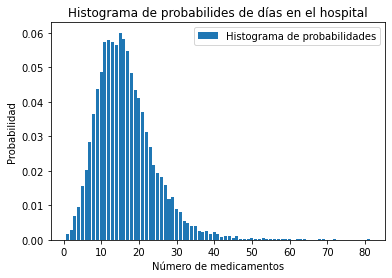

In [30]:
plt.bar(N_2_frec_prob.Valores, N_2_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.xlabel('Número de medicamentos')
plt.ylabel('Probabilidad')
plt.title('Histograma de probabilides de días en el hospital')
plt.legend()
plt.show()
plt.show()

## Kernel density estimation

A continuación calcularamos la función de masa de probabilidad (PMF) a partir del método de kernel density estimation, aplicamos la función de statsmodel porque esta permite tomar datos discretos o de diferentes tipos.

C:\Users\aleja\anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


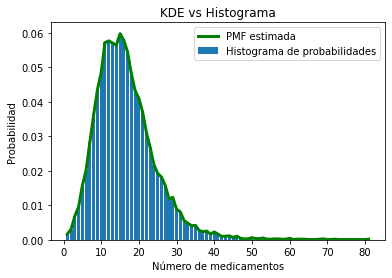

In [31]:
#definimos el grid sobre el que vamos a trabajar
N_2_grid=np.arange(1,82)

#aplicamos nuestra función 
pmf_N2=kde_statsmodels_m(N_2, N_2_grid, bandwidth=0.2)

#gráfica
plt.bar(N_2_frec_prob.Valores, N_2_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.plot(N_2_grid, pmf_N2, label='PMF estimada', color='g', linewidth=3)
plt.xlabel('Número de medicamentos')
plt.ylabel('Probabilidad')
plt.title('KDE vs Histograma')
plt.legend()
plt.show()

Observamos que la pmf calcualda con el KDE se ajusta perfectamente a nuestros datos y sigue la misma distribución.

## Método de la transformada inversa para generar números pseudoaleatorios

Dado que tenemos una distribución discreta utilizamos el método de la transformada inversa para generar números pseudoaleatorios que disrtibuyan coomo nuestros datos. Para hacer esto calculamos la probabilidad acumulada y después aplicamos el método para N números. 

In [32]:
N_2_frec_prob['Acumulada']=N_2_frec_prob.Probabilidad.cumsum()
N_2_frec_prob

,Valores,Frecuencias,Probabilidad,Acumulada
0,1,18,0.001578,0.001578
1,2,34,0.002980,0.004557
2,3,78,0.006836,0.011394
3,4,109,0.009553,0.020947
4,5,179,0.015688,0.036635
...,...,...,...,...
62,64,1,0.000088,0.999562
63,68,1,0.000088,0.999649
64,69,2,0.000175,0.999825
65,72,1,0.000088,0.999912


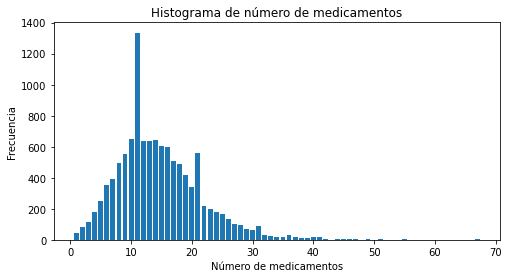

In [33]:
N=len(N_2)
N_2_u=np.random.rand(N) #generamos valores aleatorios
v_N2=Gen_distr_discreta(N_2_u, N_2_frec_prob.Acumulada)+1 #aplicamos función de trasnformada inversa

plot_histogram_discrete(v_N2, 'Número de medicamentos', 'Frecuencia', 'Histograma de número de medicamentos') #graficamos

Podemos observar a partir del histograma realizado por el método de la transformada inversa que en su forma la distribución de los datos sí es muy similar excepto por los picos. En la gráfica siguiente graficamos ambos datos para observar más fácilmente la diferencia. 

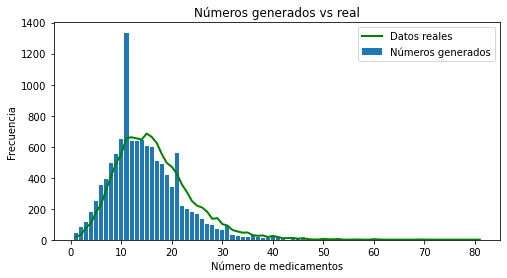

In [34]:
plt.figure(figsize=[8,4])
y,x = np.histogram(v_N2,bins = len(set(v_N2))) 
plt.bar(list(set(v_N2)),y, label= 'Números generados')
plt.plot(N_2_frec_prob.Valores, N_2_frec_prob.Frecuencias, color='g', lw=2, label='Datos reales')
plt.legend()
plt.xlabel('Número de medicamentos')
plt.ylabel('Frecuencia')
plt.title('Números generados vs real')
plt.show()

A partir de está grafica es fácil ver que los datos generados con el método de la transoformada inversa distribuyen de manera similar similarmente a los valores reales, sin embargo en este caso tenemos el pico de los números generados, y además los datos reales antes del pico son menores que los valores generados por la función y posterior al pico son mayores. Es posible que estos picos estén generando un movimiento en la distribución y que está se vuelva difícil de estimar por medio de este método.

## Media y desviación estándar teórica

La esperanza de una distribución discreta se calcula con la siguiente fórmula:

$$E[X]=\sum_{j=1}^{m} p_jx_j.$$

La varianza de una distribución discreta se calcula con la siguiente fórmula:

$$\sigma_X^2=\sum_{j=1}^{m} p_j(x_j-E[X])^2.$$

In [35]:
media_N2= np.sum([N_2_frec_prob.Valores[i]*N_2_frec_prob.Probabilidad[i] 
               for i in range(len(N_2_frec_prob.Frecuencias))])

sigma_N2=np.sqrt(np.sum([N_2_frec_prob.Probabilidad[i]*(N_2_frec_prob.Valores[i] - media_N2)**2
               for i in range(len(N_2_frec_prob.Frecuencias))]))

print('Media por medio de definición de distibuciones discretas: ', media_N2)
print('Desviación estándar por medio de definición de distibuciones discretas: ', sigma_N2)

Media por medio de definición de distibuciones discretas:  16.48729184925504
Desviación estándar por medio de definición de distibuciones discretas:  7.700453890796918


## Montecarlo

In [36]:
N = len(N_2)
u_n2 = np.random.rand(N) #generación de valores aleatorios
f_u_n2 = Gen_distr_discreta(u_n2 ,N_2_frec_prob.Acumulada)+1 #función 
media_montecarlo_N2 = np.mean(f_u_n2)
sigma_montecarlo_N2= np.std(f_u_n2)


print('Media con Montecarlo: ', media_montecarlo_N2)
print('La desviación estándar con el método montecarlo: ', sigma_montecarlo_N2)

Media con Montecarlo:  16.517440841367222
La desviación estándar con el método montecarlo:  7.813957653099478


## Método de reducción de varianza: estratificación

In [37]:
f_u2_n2= lambda U: Gen_distr_discreta(U, N_2_frec_prob.Acumulada)+1
U_n2= estra_igualmente_espaciado(N)
valores_estrat_N2= f_u2_n2(U_n2)
media_estrat_N2=np.mean(valores_estrat_N2)
sigma_estrat_N2=np.std(valores_estrat_N2)

print('Media con reudcción de viaranza estratificada=', media_estrat_N2)
print('La desviación estándar con el método de esratificación es: ', sigma_estrat_N2)

Media con reudcción de viaranza estratificada= 16.484224364592464
La desviación estándar con el método de esratificación es:  7.679249504495202


## Método de reducción de varianza: números complementarios

In [38]:
ri = np.random.rand(N)
ri_c = 1-ri 
U1= f_u2_n2(ri)
U2= f_u2_n2(ri_c)

m4 = (U1.mean()+U2.mean())/2

print('Complementario =',np.mean(m4))

Complementario = 16.488299737072744


## Estimación de parámetros para distribuciones y método cuantil cuantil

Estimaremos los parámetros para distintas disrtibuciones discretas y posteriormente utilizaremos el método cuantil cuantil para verificar el ajustes de los datos reales a una distribución dada

### Binomial

Los parámetros de la distribución binomial son n y p y estos los calcularemos a partir de la media y la desviación estándar.

- $\mu= np$
- $\sigma ^2 = np(1-p)$

A continuación estimaremos los parámetros para una distribución binomial para el nodo 1, utilizando la media y la varianza calculadas teóricamente. Primero despejamos las ecuacións usando n y p.

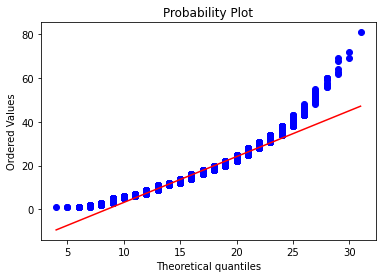

In [39]:
def binomial_N2(x: 'Vector de valores para n y p'):
    'Esta función se utiliza para conocer los parámetros n y p, dadas miu y sigma'
    n=x[0]
    p=x[1]
    return [media_N2-n*p,
            (sigma_N2**2)-n*p*+n*p**2]

param_binom_N2=fsolve(binomial_N2, [1,0.6]) #estimación de parámetros
n_N2=param_binom[0]; p_N2=param_binom[1]



#aplicación del método cuantil cuantil
fig = plt.figure()
ax = fig.add_subplot(111)
res=st.probplot(N_2, dist='binom', sparams=param_binom_N2, plot=ax)
plt.show()

### Poisson

Los parámetros de la distribución de poisson es lambada que corresponde a la media de los datos, por lo tanto utilizaremos la media para aplicar el método de cuantil cuantil 



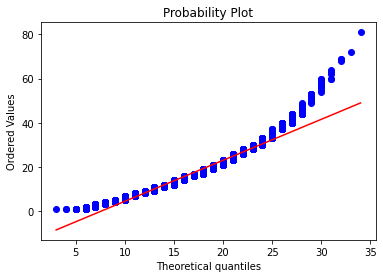

In [40]:
lambda_p_N2= media_N2 #parámetro de la distribución poisson


fig = plt.figure()
ax = fig.add_subplot(111)
res=st.probplot(N_2, dist='poisson', sparams=( lambda_p_N2), plot=ax)
plt.show()

### Geométrica

Los parámetros de la distribución goemétrica corresponde a p y este lo podemos estimar diréctamente de la media, con la siguiente igualdad. 

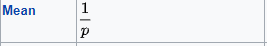



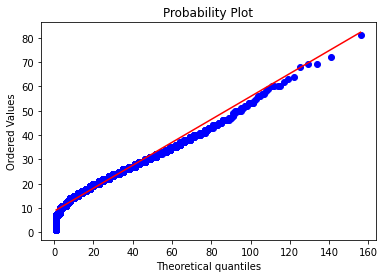

In [41]:
p_geom_N2=1/media_N2 #parámetro p

fig = plt.figure()
ax = fig.add_subplot(111)
res=st.probplot(N_2, dist='geom', sparams=(p_geom_N2), plot=ax)
plt.show()

### Distribución binomial negativa

La distribución binomial depende de los parámetros r y p que se pueden estimar con el siguiente sistema de ecuaciones.
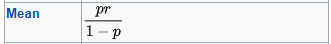
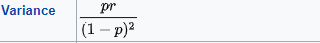

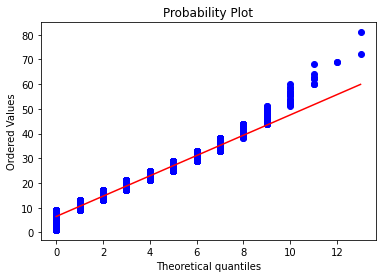

In [42]:
def nbinom_N2(x: 'Vector de valores para n y p'):
    'Esta función se utiliza para conocer los parámetros n y p, dadas miu y sigma'
    p=x[0]
    r=x[1]
    return [media_N2-(p*r)/(1-p),
            (sigma_N2**2)-(p*r)/(1-2*p+p**2)]

param_nbinom_N2=fsolve(nbinom_N2, [0.6,1])
p_binom_N2=param_nbinom_N2[0]; r_N2=param_nbinom_N2[1]


fig = plt.figure()
ax = fig.add_subplot(111)
res=st.probplot(N_2, dist='nbinom', sparams=(r_N2,p_binom_N2), plot=ax)
plt.show()

A partir de esto podemos determinar que la distribución que mejor se ajusta es la distribución geométrica con los siguientes parámetros:

In [43]:
print('El parámetro n para la disrtibución geométrica es', p_geom_N2)

El parámetro n para la disrtibución geométrica es 0.06065277482458005


En la siguiente gráfica mostramos nuestra distribución real junto con la teórica estimada.

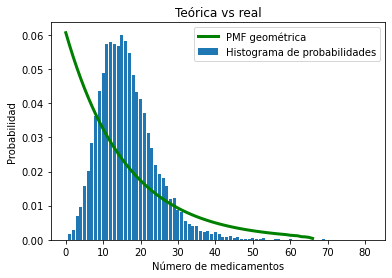

In [348]:
pmf_geom_N2=getattr(st, 'geom').pmf(N_2_frec_prob.Valores, p_geom_N2)

#gráfica
plt.bar(N_2_frec_prob.Valores, N_2_frec_prob.Probabilidad, label='Histograma de probabilidades')
plt.plot(pmf_geom_N2, label='PMF geométrica', color='g', linewidth=3)
plt.xlabel('Número de medicamentos')
plt.ylabel('Probabilidad')
plt.title('Teórica vs real')
plt.legend()
plt.show()

para el caso del nodo 2 observamos que el uso de una distribución teórica no es bueno, en este caso es mucho mejor usar la pmf calculada con el método de KDE, aunque la transformada inversa no es tan mala, esta no se ajusta de la manera más optima a nuestros datos

## Prueba de hipotesis: correlación de Kendall Tau, medicamentos y tiempo en el hospital
$$ H_0: tau_{XY}=0$$
$$ H_a: tau_{XY}\neq0$$

Establecemos un nivel de significancia del 5% para esta prueba.

In [341]:
tiempo = N_1
med = N_2

#aplicar inidce de correlación de kendall 
corr = st.kendalltau(tiempo, med, method ='asymptotic')

Rxy=corr[0]

# Cálculo del p-value 
T = Rxy * np.sqrt((N - 2) / (1 - Rxy**2))
p_val = st.t.pdf(T, df=N-2)

print('El p-value de esta prueba es de : ',p_val)
print('EL coeficiente de correlación de Kendall tau es de : ',Rxy)


El p-value de esta prueba es de :  1.0138494362384807e-295
EL coeficiente de correlación de Kendall tau es de :  0.334833549438733


Dado que el p-value es un valor tan pequeño rechazamos la hipótesis nula y decimos entonces que la correlación de tau es diferente de 0 por lo tanto existe un grado de correlación entre las variables.

## Prueba de hipotesis: Chi cuadrada para población (Hombres y mujeres)

- $H_0$: $P_m = P_F$
- $H_1$: $P_m, P_F$

Usaremos un nivel de significancia del 5% para está prueba. 

In [342]:
#Selección de los datos
data2=pd.read_csv("data")

columnas=['Unnamed: 0','number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses',
          'race_Caucasian', 'race_AfricanAmerican', 'age_[70-80)', 'age_[60-70)', 'age_[50-60)', 'age_[80-90)',
          'age_[40-50)', 'payer_code_?', 'payer_code_MC', 'payer_code_HM',
          'payer_code_SP', 'payer_code_BC', 'medical_specialty_?',
          'medical_specialty_InternalMedicine','medical_specialty_Emergency/Trauma',
          'medical_specialty_Family/GeneralPractice', 'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
          'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
          'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428', 
          'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
          'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
          'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
          'tolbutamide_No', 'pioglitazone_No', 'rosiglitazone_No', 'acarbose_No',
          'miglitol_No', 'troglitazone_No', 'tolazamide_No', 'examide_No',
          'citoglipton_No', 'insulin_No', 'glyburide-metformin_No',
          'glipizide-metformin_No', 'glimepiride-pioglitazone_No',
          'metformin-rosiglitazone_No', 'metformin-pioglitazone_No', 'change_No','diabetesMed_Yes',"time_in_hospital",
          "num_procedures","num_medications","num_lab_procedures"]
data2.drop(columnas, axis=1, inplace=True)
data2.head()



,gender_Female,readmitted2
0,False,0
1,True,13
2,True,28
3,True,9
4,True,0


In [343]:
H2 = pd.DataFrame({'Sexo Femenino':data2.gender_Female, "Readmision" : data2.readmitted2})
H2.loc[H2['Readmision'] > 1, 'Readmision'] = 1
H2.loc[H2['Sexo Femenino'] == True, 'Sexo Femenino'] = 1
H2.loc[H2['Sexo Femenino'] == False, 'Sexo Femenino'] = 0
H2

,Sexo Femenino,Readmision
0,0,0
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
24995,0,0
24996,1,1
24997,0,1
24998,0,1


In [344]:
# Solamente los readmitidos
H2R= H2[H2['Readmision']!=0]
# Solamente los no readmitidos
H2NR = H2[H2['Readmision']==0]

# Conteo
x = np.count_nonzero(H2R['Sexo Femenino'])
x2 = len(H2R)-np.count_nonzero(H2R['Sexo Femenino'])
y = np.count_nonzero(H2NR['Sexo Femenino'])
y2 = len(H2NR)-np.count_nonzero(H2NR['Sexo Femenino'])

In [345]:
H3 = pd.DataFrame(index=['Femenino','Masculino','TOTAL'],columns=['Readmitido','No Readmitido','total'])
H3.iloc[0,:-1] = [x,x2]
H3.iloc[1,:-1] = [y,y2]
H3['total'] = H3.sum(axis=1)
H3.loc['TOTAL',:] = H3.sum(axis=0)
H3


,Readmitido,No Readmitido,total
Femenino,6264,5146,11410.0
Masculino,7173,6417,13590.0
TOTAL,13437,11563,25000.0


In [346]:
P = H3.iloc[0,2]/H3.iloc[-1,-1]



f_o = H3.loc[H3.index!='TOTAL',H3.columns!='total'].values.flatten()
f_e = np.concatenate([H3.iloc[-1,:-1]*P,H3.iloc[-1,:-1]*(1-P)])

x2 = st.chisquare(f_o , f_e, ddof=2)
print('Valor de chi cuadrado = ',list(x2)[0],',p-value de la prueba=',list(x2)[1])

Ji = st.chi2.ppf(q = 0.95, df=2)
print('Estadístico de Ji = ',Ji)

Valor de chi cuadrado =  11.189827638089362 ,p-value de la prueba= 0.0008224698490699313
Estadístico de Ji =  5.991464547107979


Dado que el p-value es más pequeño que nuestro nivel de confianza entonces rechazamos la hipótesis nula y decimos que las poblaciones de hombres y mujeres son distintas.

# Conclusiones

## Conclusiones generales

A partir de las pruebas de hipótesis observamos dos cosas importantes, la primera es que comprobamos que existe una correlación entre el tiempo en el hospital y el número de medicamentos esto va  en línea con un razón lógica ya que si los pacientes están más tiempo en el hospital, por lo tanto podrán tomar mucho más medicamento que aquellos que solo duran un día por ejemplo. 


## Conclusiones específicas por nodo 

### Nodo 1

El nodo 1 que corresponde al tiempo en el hospital se puede modelar con una distribución binomial, aunque esta no es muy exacta conviene modelarla con el método de la transformada inversa o el KDE. Además observamos que la media se ubica en 4.58 es decir de los pacientes que son readmitidos están en promedio 4-5 días en el hospital poder simular esta distribución nos dice con que probabilidad el paciente va a estar en el hospital n número de días sabiendo que será readmitido. 

### Nodo 2

El nodo 2 que corresponde al número de medicamentos en el hospital se puede modelar teporicamente con una distribución geométrica, sin embargo en su forma gráfica los datos no son nada similares. La media de los medicamentos se ubica en 16-17 es decir que de los pacientes que son readmitidos en promedio reciben 16-17 medicamentos. Simular estos datos nos permite conocer la probilidad de cuantos medicamentos va a recibir el paciente sabiend que será readmitido en el futuro. 



# Referencias.
> Humberto Brandão. (2017). Diabetes 130 US hospitals for years 1999-2008. 02-10-2020, de Kaggle Sitio web: https://www.kaggle.com/brandao/diabetes?select=diabetic_data.csv

>The SciPy community. (2020). Statistical Functions. 05-10-2020, de The SciPy community Sitio web: https://docs.scipy.org/doc/scipy/reference/stats.html

>John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team. (2012). API Overview matplotlib.pyplot. 08-11-2020, de The Matplotlib development team Sitio web: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.html

> Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Renatta Garcia Sanchez and Alejandro Michel Marrón.
</footer>